In [2]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/Steel_industry_data.csv')
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

In [4]:
df.shape

(35040, 11)

In [5]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

/tmp/ipykernel_205078/3018716760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


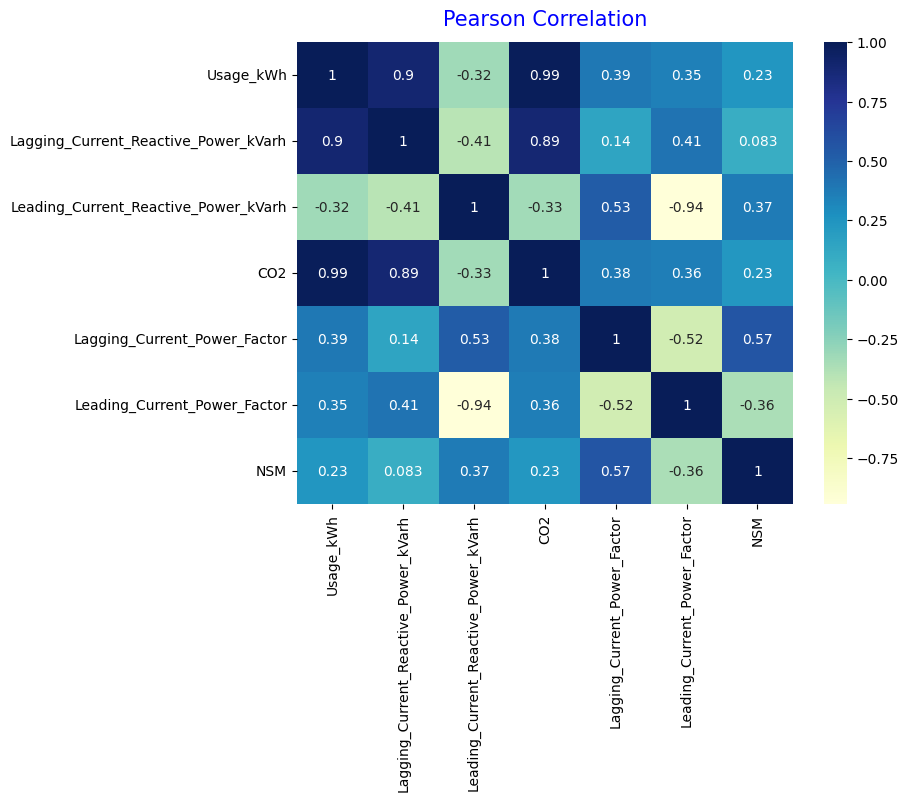

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

In [38]:
df = pd.read_csv('../data/Steel_industry_data.csv')
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

# df = df.set_index('date')
# print(df.index)
#df["date"] =

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# создаем новые поля "hour" и "minute"
df['time'] = (df['date'].dt.hour * 60. + df['date'].dt.minute) / (24. * 60.)
# df['minute'] = df['date'].dt.minute / 60.

# удаляем поле "date", если оно больше не нужно
df.drop('date', axis=1, inplace=True)

#handling categorical data
df = pd.get_dummies(df, drop_first=True)
df.head()

# train-test split for time series
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df[:train_size], df[train_size:]

# X_train = train.drop('Usage_kWh', axis = 1)
# y_train = train['Usage_kWh']
#
# X_test = test.drop('Usage_kWh', axis = 1)
# y_test = test['Usage_kWh']

train.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,time,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0.010417,0,1,0,0,0,0,0,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0.020833,0,1,0,0,0,0,0,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0.031250,0,1,0,0,0,0,0,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0.041667,0,1,0,0,0,0,0,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0.052083,0,1,0,0,0,0,0,0,0


In [9]:
# import pandas as pd
# import numpy as np
#
# # создаем пример DataFrame
# df = pd.DataFrame({'A': [1, 2., 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
#
# # преобразовываем DataFrame в массив NumPy
# array = df.values
#
# print(array)

In [48]:
import torch


def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset) - lookback - 1):
        feature = dataset[i:i + lookback].values
        target = dataset[i + lookback:i + lookback + 1]['Usage_kWh'].values
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)


lookback = 10
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test[0][0][0])


torch.Size([23465, 10, 17]) torch.Size([23465, 1])
torch.Size([11553, 10, 17]) torch.Size([11553, 1])
tensor(13.4300, dtype=torch.float64)


In [39]:
import torch
import torch.nn as nn


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu').double()
        self.fc = nn.Linear(hidden_size, output_size).double()

        # for name, param in self.rnn.named_parameters():
        #     if 'weight_ih' in name:
        #         torch.nn.init.xavier_uniform_(param)
        #     elif 'weight_hh' in name:
        #         torch.nn.init.orthogonal_(param)
        #     elif 'bias' in name:
        #         torch.nn.init.constant_(param, 0.0)

    def forward(self, x):
        out, _ = self.rnn(x)
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [12]:
learning_rate = 0.01

model = RNNModel(10, 10, 1, 5)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

import torch.utils.data as data

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

for X_batch, y_batch in loader:
    print(X_batch.shape)
    print(y_batch.shape)
    break

# for i in model.parameters():
#     print(i)
#     break

torch.Size([8, 1, 17])
torch.Size([8, 1])


In [49]:
from tqdm import tqdm

import numpy as np
import torch.optim as optim
import torch.utils.data as data
import time

num_layers = 6

model = RNNModel(17, 64, 1, num_layers)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=128)

n_epochs = 100
for epoch in range(n_epochs):
    print(epoch)
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        #print(y_pred)
        #print(X_batch)
        #print(time.sleep(3))
        loss = loss_fn(y_pred, y_batch)
        #print(np.sqrt(loss.detach().numpy()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    #
    # break
    # if epoch % 100 != 0:
    #     continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    #print(y_pred[:10], y_test[:10])
    #print(X_test[:10])
    #break

0
Epoch 0: train RMSE 34.0598, test RMSE 31.3988
1
Epoch 1: train RMSE 31.7601, test RMSE 29.4246
2
Epoch 2: train RMSE 25.0397, test RMSE 21.5161
3
Epoch 3: train RMSE 18.5748, test RMSE 16.4599
4
Epoch 4: train RMSE 20.4043, test RMSE 19.9991
5
Epoch 5: train RMSE 14.2687, test RMSE 12.6346
6
Epoch 6: train RMSE 14.8823, test RMSE 12.0328
7
Epoch 7: train RMSE 15.5316, test RMSE 14.5603
8
Epoch 8: train RMSE 13.8408, test RMSE 11.5761
9
Epoch 9: train RMSE 14.5625, test RMSE 11.9057
10
Epoch 10: train RMSE 14.6845, test RMSE 11.9121
11
Epoch 11: train RMSE 13.7899, test RMSE 12.0894
12


KeyboardInterrupt: 